In the note book I have also addded my mistakes (i.e things I tried at first) the actual part is from realisation markdown

the unnecessary (mistakes) things are double quoted😅

In [54]:
# Importing necessary modules from the Python standard library and external libraries
"""from pathlib import Path 
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd  

import keras"""

Anlaysing the given dataset 

In [55]:
'''dst = pd.read_csv("train.csv")'''

In [56]:
"""print("Dst shape: ", dst.shape)
dst.head()"""

Dst shape:  (104409, 10)


,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1992,12,13,-4.99,156.0,4.8,-2.8,78.5,28.98,30.06
1,1989,5,14,0.00,-110.1,-2.5,2.4,NaN,24.95,25.23
2,1993,6,28,2.04,-110.2,-4.5,5.9,NaN,25.78,27.84
3,1995,1,8,1.98,-140.0,-7.7,1.2,82.6,26.47,26.86
4,1995,2,21,5.01,-170.0,-5.4,-6.6,75.2,28.83,28.90


In [57]:
#Sorting the data date wise
"""dst['date'] = pd.to_datetime(dst[['year', 'month', 'day']])
df_sorted = dst.sort_values(by='date')
df_sorted = df_sorted.reset_index(drop=True)
df_sorted = df_sorted.drop(columns=['date'])
df_sorted.to_csv('sorted_file.csv', index=False)"""

checking for null values


In [58]:
"""df_sorted.isna().sum()"""

year             0
month            0
day              0
latitude         0
longitude        0
zon.winds    14570
mer.winds    14570
humidity     38794
air temp.     7838
s.s.temp.        0
dtype: int64

In [59]:
"""print("Dst shape: ", df_sorted.shape)
df_sorted.head()"""

Dst shape:  (104409, 10)


,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1980,3,8,-0.02,-109.44,-4.9,1.1,NaN,25.66,25.97
1,1980,3,9,-0.02,-109.44,-4.5,2.2,NaN,25.69,25.28
2,1980,3,10,-0.02,-109.44,-3.8,1.9,NaN,25.56,24.31
3,1980,3,12,-0.02,-109.44,-4.4,0.3,NaN,24.72,23.64
4,1980,3,13,-0.02,-109.44,-3.2,0.1,NaN,24.66,24.34


In [60]:
#Filling null values with median of the data set
"""df_sorted= df_sorted.fillna(df_sorted.median())"""

In [61]:
"""df_sorted.isna().sum()"""

year         0
month        0
day          0
latitude     0
longitude    0
zon.winds    0
mer.winds    0
humidity     0
air temp.    0
s.s.temp.    0
dtype: int64

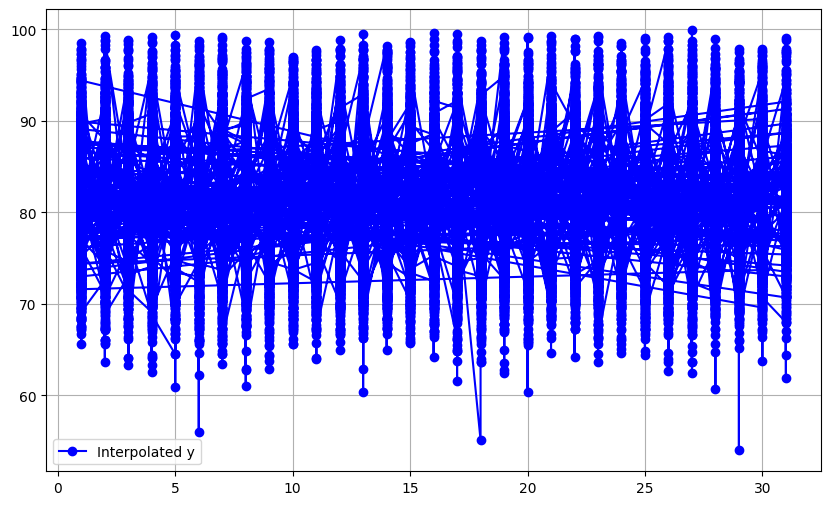

In [62]:
"""plt.figure(figsize=(10, 6))
plt.plot(df_sorted['day'], df_sorted['humidity'], marker='o', linestyle='-', color='b', label='Interpolated y')
plt.legend()
plt.grid(True)
plt.show()"""

Finding the correlation

In [63]:
# Droping the 'date' column as it's not needed for correlation calculation
"""df_sorted = df_sorted.drop(columns=['year','month','day'])
correlation_matrix = df_sorted.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)"""


Correlation Matrix:
           latitude  longitude  zon.winds  mer.winds  humidity  air temp.  \
latitude   1.000000   0.039898   0.114384   0.001772  0.140692   0.070840   
longitude  0.039898   1.000000   0.361216  -0.107744 -0.031790   0.338117   
zon.winds  0.114384   0.361216   1.000000   0.071511  0.049049   0.184576   
mer.winds  0.001772  -0.107744   0.071511   1.000000  0.088919  -0.353628   
humidity   0.140692  -0.031790   0.049049   0.088919  1.000000  -0.303356   
air temp.  0.070840   0.338117   0.184576  -0.353628 -0.303356   1.000000   
s.s.temp.  0.127508   0.425969   0.312271  -0.314330 -0.256204   0.908293   

           s.s.temp.  
latitude    0.127508  
longitude   0.425969  
zon.winds   0.312271  
mer.winds  -0.314330  
humidity   -0.256204  
air temp.   0.908293  
s.s.temp.   1.000000  


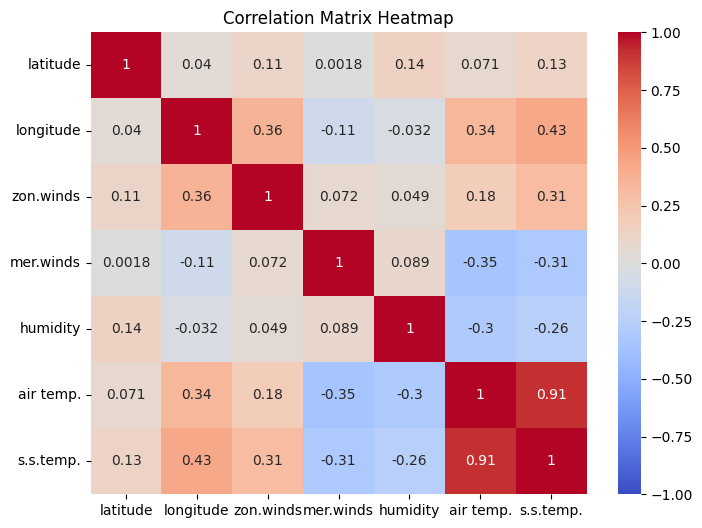

In [64]:
"""import seaborn as sns
import matplotlib.pyplot as plt"""

# Creating a heatmap to visualize the correlation matrix
"""plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()"""

In [65]:
#Choosing the top 4 best correlational values for best possible outcome(model training)
"""correlation_with_y1 = correlation_matrix['s.s.temp.'].abs()
correlation_with_y1 = correlation_with_y1.drop('s.s.temp.')
top_4_columns = correlation_with_y1.sort_values(ascending=False).head(4).index.tolist()
print("\nTop 4 Columns Based on Correlation with 'y1' (excluding 'y1' itself):")
print(top_4_columns)"""



Top 4 Columns Based on Correlation with 'y1' (excluding 'y1' itself):
['air temp.', 'longitude', 'mer.winds', 'zon.winds']


Normalising the data set

In [66]:
"""import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense"""

In [67]:
"""df_filtered = df_sorted[top_4_columns + ['s.s.temp.']]"""

# Spliting the data into training and testing sets
"""train_size = 0.8
train_data, test_data = train_test_split(df_filtered, train_size=train_size, shuffle=False)
print("\nTraining Data:")
print(train_data)
print("\nTesting Data:")
print(test_data)"""



Training Data:
       air temp.  longitude  mer.winds  zon.winds  s.s.temp.
0          25.66    -109.44        1.1       -4.9      25.97
1          25.69    -109.44        2.2       -4.5      25.28
2          25.56    -109.44        1.9       -3.8      24.31
3          24.72    -109.44        0.3       -4.4      23.64
4          24.66    -109.44        0.1       -3.2      24.34
...          ...        ...        ...        ...        ...
83522      26.06    -155.00       -3.9       -6.1      27.08
83523      27.33     156.00        0.2       -3.3      29.48
83524      28.75     156.10        0.4       -4.2      29.30
83525      24.92    -125.00        0.4       -4.2      25.25
83526      28.02     164.40       -3.2       -6.4      28.30

[83527 rows x 5 columns]

Testing Data:
        air temp.  longitude  mer.winds  zon.winds  s.s.temp.
83527       26.16    -139.90        0.6       -7.4      26.34
83528       24.77    -140.00       -0.5       -6.2      25.06
83529       29.05     165

In [68]:
# Normalizing both the feature columns and the target column
"""scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

train_features_scaled = scaler_features.fit_transform(train_data[top_4_columns])
train_target_scaled = scaler_target.fit_transform(train_data[['s.s.temp.']])

test_features_scaled = scaler_features.transform(test_data[top_4_columns])
test_target_scaled = scaler_target.transform(test_data[['s.s.temp.']])"""

# Reconstructing the scaled train and test data with s.s.temp. scaled
"""train_scaled = np.hstack((train_features_scaled, train_target_scaled))
test_scaled = np.hstack((test_features_scaled, test_target_scaled))"""

In [ ]:
"""from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error"""

Training the model


In [70]:
"""def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length, :-1]  # Excluding the last column ('s.s.temp.') for features
        y = data[i+seq_length, -1]     # Predicting the last column ('s.s.temp.')
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)
seq_length = 3"""

# Creating sequences for training and testing sets
"""X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

print("\nShape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)"""


Shape of X_train: (83524, 3, 4)
Shape of y_train: (83524,)
Shape of X_test: (20879, 3, 4)
Shape of y_test: (20879,)


In [71]:
# Step 6: Build and train the LSTM model
"""model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='', loss='mse')"""

# Train the model with a specified batch size
"""batch_size = 32
model.fit(X_train, y_train, epochs=20, batch_size=batch_size, verbose=1)
model.summary()"""

# Step 7: Evaluate the model on the testing data
"""loss = model.evaluate(X_test, y_test, verbose=1)
print("\nTest Loss:", loss)"""

Epoch 1/20
2611/2611 [==============================] - 11s 4ms/step - loss: 0.0258
Epoch 2/20
2611/2611 [==============================] - 8s 3ms/step - loss: 0.0216
Epoch 3/20
2611/2611 [==============================] - 9s 3ms/step - loss: 0.0215
Epoch 4/20
2611/2611 [==============================] - 8s 3ms/step - loss: 0.0214
Epoch 5/20
2611/2611 [==============================] - 8s 3ms/step - loss: 0.0213
Epoch 6/20
2611/2611 [==============================] - 8s 3ms/step - loss: 0.0212
Epoch 7/20
2611/2611 [==============================] - 19s 7ms/step - loss: 0.0211
Epoch 8/20
2611/2611 [==============================] - 9s 4ms/step - loss: 0.0211
Epoch 9/20
2611/2611 [==============================] - 9s 3ms/step - loss: 0.0210
Epoch 10/20
2611/2611 [==============================] - 9s 3ms/step - loss: 0.0210
Epoch 11/20
2611/2611 [==============================] - 8s 3ms/step - loss: 0.0210
Epoch 12/20
2611/2611 [==============================] - 8s 3ms/step - loss: 0.0210

In [72]:
"""predictions = model.predict(X_test)

# Step 9: Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("\nRMSE:", rmse)

# Print true values and predicted values for comparison
print("\nTrue Values and Predicted Values:")
comparison_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': predictions.flatten()})
print(comparison_df)"""

'predictions = model.predict(X_test)\n\n# Step 9: Calculate RMSE\nrmse = np.sqrt(mean_squared_error(y_test, predictions))\nprint("\nRMSE:", rmse)\n\n# Print true values and predicted values for comparison\nprint("\nTrue Values and Predicted Values:")\ncomparison_df = pd.DataFrame({\'True Values\': y_test, \'Predicted Values\': predictions.flatten()})\nprint(comparison_df)'

Making predictions and calculating loss (rmse)

In [73]:
"""predictions_scaled = model.predict(X_test)"""

653/653 [==============================] - 2s 3ms/step


In [74]:
"""predictions_unscaled = scaler_target.inverse_transform(predictions_scaled)
y_test_unscaled = scaler_target.inverse_transform(y_test.reshape(-1, 1))"""

# Calculating RMSE
"""rmse = np.sqrt(mean_squared_error(y_test_unscaled, predictions_unscaled))
print("\nRMSE:", rmse)"""

# Printing true values and predicted values for comparison
"""print("\nTrue Values and Predicted Values:")
comparison_df = pd.DataFrame({'True Values': y_test_unscaled.flatten(), 'Predicted Values': predictions_unscaled.flatten()})
print(comparison_df)"""


RMSE: 2.3640072445956593

True Values and Predicted Values:
       True Values  Predicted Values
0            25.98         26.923246
1            30.02         26.740101
2            25.67         27.202860
3            29.20         27.012623
4            22.08         26.645868
...            ...               ...
20874        22.84         27.124416
20875        29.69         26.788376
20876        22.88         27.511429
20877        28.50         26.123575
20878        27.31         26.773928

[20879 rows x 2 columns]


Realisation.....

Seeing the data set,using lstm based on adaptive neural network seems to overfit the model.Which made me realise the data set is simple (which also implies that there is no need to select particular features to train model)and I should use a simpler model.

Using a simpler model i.e. random forest regressor

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#importing the data set
df = pd.read_csv('train.csv')

#imputing the null values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

#scaling the data set for better training of model
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_imputed.drop(columns=['s.s.temp.']))
scaled_df = pd.DataFrame(scaled_features, columns=df_imputed.columns[:-1])
scaled_df['s.s.temp.'] = df_imputed['s.s.temp.']
X = scaled_df.drop(columns=['s.s.temp.'])
y = scaled_df['s.s.temp.']

#splitting data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training the model
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

#making predictions and finding rmse(root mean square error)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 0.31320039914490727


In [3]:
print(y_pred)

[29.74563333 26.7218     26.3132     ... 29.10866667 27.9573
 26.86566667]


finding r2 score

In [4]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 0.9792407861848774


Making predictions on the evaluation dataset


In [5]:
df1 = pd.read_csv('data_1997_1998.csv')
df1 = df1.drop(columns=['Index'])
df1.to_csv('data.csv', index=False)
imputer = SimpleImputer(strategy='median')
df1_imputed = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)
scaler = StandardScaler()
scaled_features1 = scaler.fit_transform(df1_imputed)
pred = model.predict(scaled_features1)
print(pred)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[20.0104     19.97393333 19.83543333 ... 27.23316667 27.39526667
 27.50646667]


In [6]:
df2 = pd.read_csv('evaluation.csv')
df2 = df2.drop(columns=['Index'])
df2.to_csv('data.csv', index=False)
imputer = SimpleImputer(strategy='median')
df2_imputed = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)
scaler = StandardScaler()
scaled_features2 = scaler.fit_transform(df2_imputed)
pred1 = model.predict(scaled_features2)
print(pred1)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[29.827      28.7137     26.05893333 ... 29.13556667 29.23766667
 29.7746    ]
